In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lcapy
import pyparsing as pp

#make matplotlib hires
%config InlineBackend.figure_format='retina'

You need a version of sympy later than 1.10 for this notebook to work
The version of sympy installed is  1.10.1


In [2]:
lcapy.show_version()

Python: 3.9.10 (main, Jan 15 2022, 11:48:04) 
[Clang 13.0.0 (clang-1300.0.29.3)]
SymPy: 1.10.1
NumPy: 1.20.2
Matplotlib: 3.3.3
SciPy: 1.6.0
Lcapy: 1.4


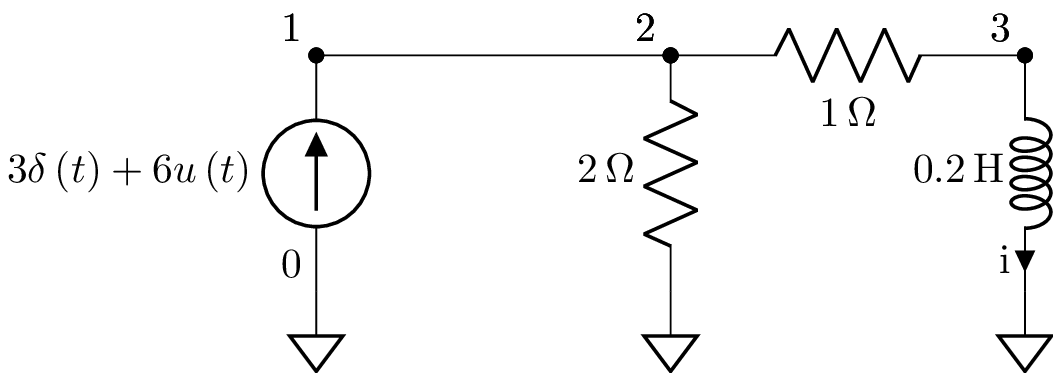

In [3]:
cct = lcapy.Circuit()
cct.add("""
    Iin 1 0 {6*u(t)+3*delta(t)}; down
    W 1 2; right=1.5
    R1 2 0 2; down
    R2 2 3 1; right=1.5
    L1 3 0 0.2; down, i=i
    ;autoground=True,label_ids=False
""")
cct.draw()

## Twin-T notch filter

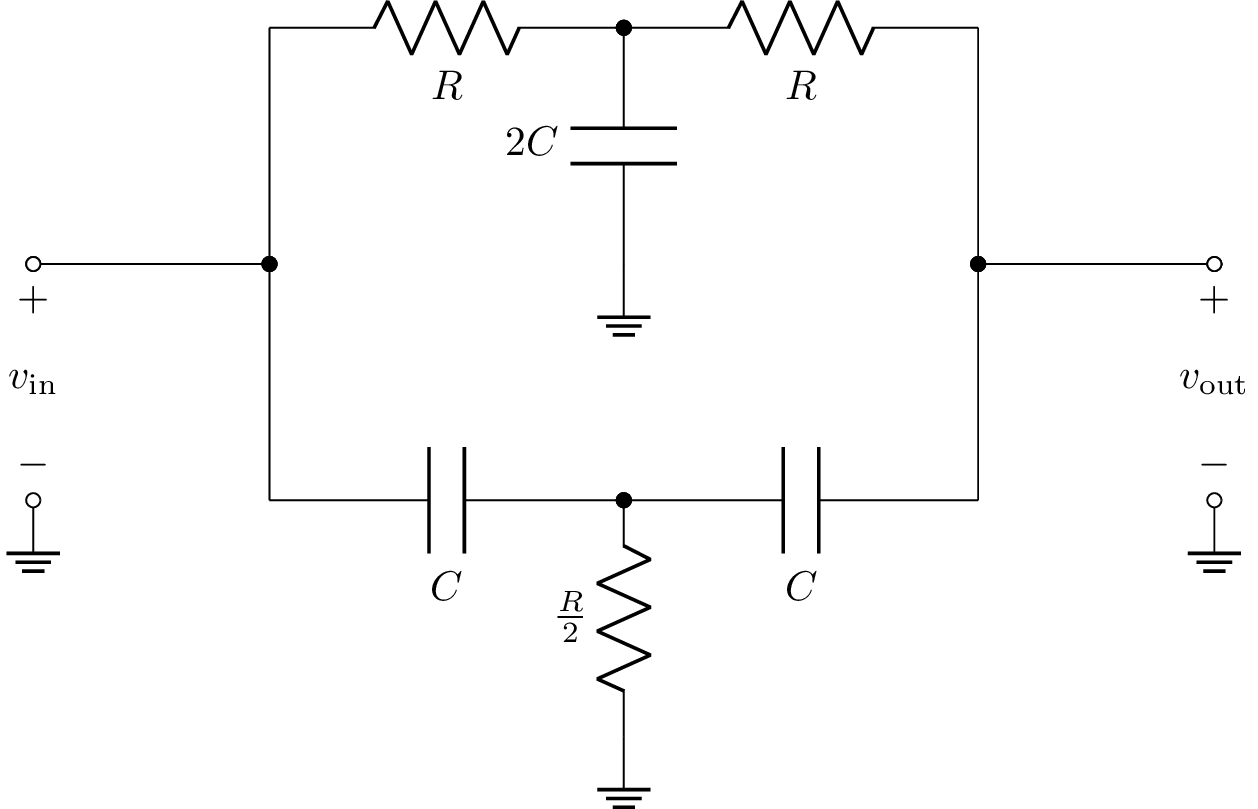

In [6]:
cct_twin = lcapy.Circuit()
cct_twin.add("""
    Pin 1 0; down, v=v_{in}
    W 1 2;
    W 9 2; down
    W 2 12; down
    R1 9 3 R; right=1.5
    R2 3 10 R; right=1.5
    W 10 6; down
    C3 3 0 {2*C}; down
    C1 12 5 C;
    C2 5 13 C;
    W 6 13; down
    R3 5 0 {R/2}; down
    W 6 7;
    Pout 7 0; v=v_{out}
    ;draw_nodes=connections, label_ids=False, autoground=ground, label_nodes=none
""")
cct_twin.draw()


In [77]:
nodes = {
    1:[160,  96],
    2:[ 48,  96],
    3:[320,  96],
    4:[240,  96],
    5:[ 48, 144],
    6:[320, 144],
    7:[ 48, 256],
    8:[ 48, 244],
    9:[320, 256],
    10:[320, 208],
}

for key in nodes.keys():
    if nodes[key] == [240,96]:
        print(key)

4


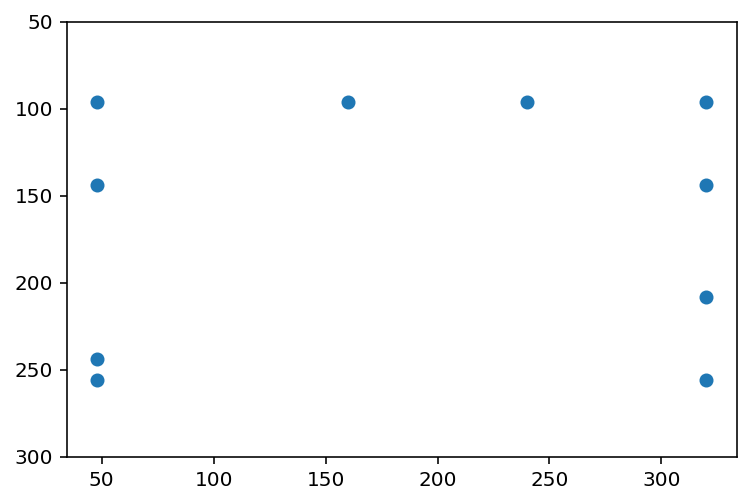

In [81]:
x = np.array(list(nodes.values())).T[0]
y= np.array(list(nodes.values())).T[1]
plt.plot(x,y,'o')
plt.ylim(300, 50)
plt.show()

In [107]:
nodes = {
    1:[160,  96],
    2:[ 48,  96],
    3:[320,  96],
    4:[240,  96],
    5:[ 48, 144],
    6:[320, 144],
    7:[ 48, 256],
    8:[ 48, 224],
    9:[320, 256],
    10:[320, 208],
}

def is_node(pair_list):
    for key in nodes.keys():
        if nodes[key] == pair_list:
            return key
    return None


def poss3(x, y, length=96, h=True):
    print("Original %d %d" % (x, y))

    s = np.linspace(1,10)*16
    for shift in [-80,-64,-48,-32,-16,0,16]:
        if h:
            pl = [x+shift+length,y]
        else:
            pl = [x, y+shift+length]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, shift, size)

def poss2(x, y, h=True):
    print("Original %d %d" % (x, y))

    s = np.linspace(1,10)*16
    for shift in [-80,-64,-48,-32,-16,0,16]:
        for delta in [16,32,48,64,80,96]:
            if h:
                pl = [x+shift+delta,y]
            else:
                pl = [x, y+shift+delta]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, shift, delta)


def poss(x,y):
    print("Original %d %d" % (x, y))
    # y shift
    for dx in [-48,-32,-16,0,16,32,48,64,80,96]:
        pl = [x+dx,y]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, dx, 0)

    # y shift
    for dx in [-48,-32,-16,0,16,32,48,64,96]:
        pl = [x+dx,y+16]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, dx, 16)

    # y shift
    for dx in [-48,-32,-16,0,16,32,48,64,96]:
        pl = [x+dx,y-16]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, dx, 16)

    # no x shift
    for dy in [-48,-32,-16,0,16,32,48]:
        pl = [x,y+dy]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, 0, dy)

    for dy in [-48,-32,-16,0,16,32,48]:

        pl = [x+16,y+dy]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, 16, dy)

    for dy in [-48,-32,-16,0,16,32,48]:

        pl = [x-16,y+dy]
        k = is_node(pl)
        if k:
            print('   ', k,'::', pl, 16, dy)


print("Voltage Source")
poss3(48,128,96,False)

print("\nResistor rotated 270 so it is horizontal")
poss3(144,112-16,96,True)

print("\nVertical Capacitor")
poss3(304+16,144,64,False)

Voltage Source
Original 48 128
    5 :: [48, 144] -80 96
    8 :: [48, 224] 0 96

Resistor rotated 270 so it is horizontal
Original 144 96
    1 :: [160, 96] -80 96
    4 :: [240, 96] 0 96

Vertical Capacitor
Original 320 144
    6 :: [320, 144] -64 64
    10 :: [320, 208] 0 64


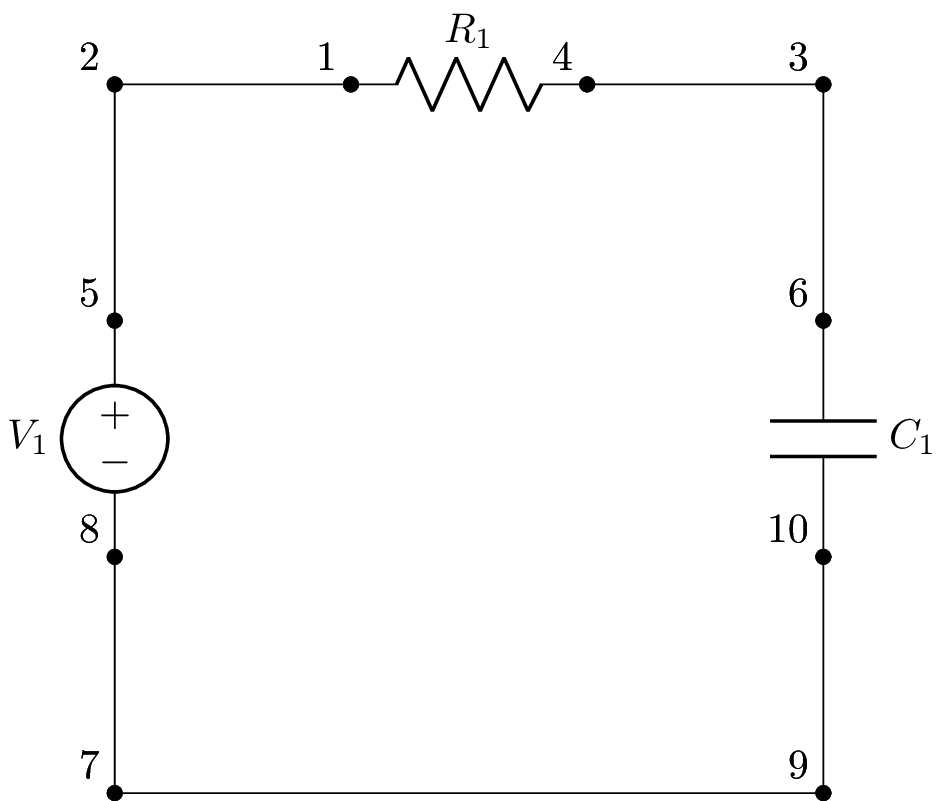

In [109]:
cct = lcapy.Circuit()
cct.add("""
W 1 2; left
W 3 4; left
W 5 2; up
W 6 3; up
W 7 8; up
W 9 10; up
W 9 7; left
R1 4 1; left
V1 5 8; down
C1 10 6; up
""")
cct.draw()

In [ ]:

160,  96 = 1
 48,  96 = 2
320,  96 = 3
240,  96 = 4
 48, 144 = 5
320, 144 = 6
 48, 256 = 7
320, 256 = 8
320, 208 = 9


W 1 2; left
W 3 4; left
W 5 2; down
W 6 3; down
W 7 8; down
W 9 10; down
W 10 7; left
Vi 2 5; down 48 128 R0 128-32=96 128+16=144
R1 1 ; 144 112 R270 (114+16) 112-16=96 144+0=144, 144+16=160
C1 6 9; down 304 144 R0 304+16=320 144+0=144 144+64=208




In [273]:
import pyparsing as pp
from pprint import pprint

test = """Version 4
SHEET 1 880 680
WIRE 160 96 48 96
WIRE 320 96 240 96
WIRE 48 144 48 96
WIRE 320 144 320 96
WIRE 48 256 48 224
WIRE 320 256 320 208
WIRE 320 256 48 256
FLAG 48 256 0
FLAG 320 96 Vo
IOPIN 320 96 Out
SYMBOL voltage 48 128 R0
WINDOW 123 24 124 Left 2
WINDOW 39 0 0 Left 2
SYMATTR Value2 AC 1
SYMATTR InstName Vi
SYMATTR Value ""
SYMBOL res 144 112 R270
WINDOW 0 32 56 VTop 2
WINDOW 3 0 56 VBottom 2
SYMATTR InstName R1
SYMATTR Value 1
SYMBOL cap 304 144 R0
SYMATTR InstName C1
SYMATTR Value 1
TEXT -72 -24 Left 2 !.step dec param w 0.1 10 100
TEXT -56 16 Left 2 !.ac list {w/(2*pi)}
"""

# define grammar for datatable
heading = pp.Group(pp.Keyword("Version") + pp.Literal("4"))
sheet = pp.Group(pp.Keyword("SHEET") + Word(nums) * 3)
rotation = pp.Group(pp.Char("R") + Word(nums))

wire = pp.Group(pp.Keyword("WIRE") + Word(nums) * 4)
window = pp.Group(pp.Keyword("WINDOW") + pp.restOfLine())
symbol = pp.Group(pp.Keyword("SYMBOL") + Word(alphanums) + Word(nums)*2 + rotation)
attr = pp.Group(pp.Keyword("SYMATTR") + Word(alphanums) + White() + pp.restOfLine())
flag = pp.Group(pp.Keyword("FLAG") + Word(nums) * 2 + Word(alphanums))
iopin = pp.Group(pp.Keyword("IOPIN") + Word(nums) * 2 + Word(alphanums))

component = pp.Group(symbol + pp.Dict(pp.ZeroOrMore(window)) + pp.Dict(pp.ZeroOrMore(attr)))

datatable = heading + sheet + pp.Dict(pp.ZeroOrMore(wire | flag | iopin | component))

# now parse data and print results
data = datatable.parseString(test)

def print_parsed(data):
    for line in data:
        element = line[0]

        if type(element) is pp.ParseResults:
            print(line[0])
            for i in range(1,len(line)):
                print('    ', line[i])
            continue
        print(element, line[1:])
        
print_parsed(data)

Version ['4']
SHEET ['1', '880', '680']
WIRE ['160', '96', '48', '96']
WIRE ['320', '96', '240', '96']
WIRE ['48', '144', '48', '96']
WIRE ['320', '144', '320', '96']
WIRE ['48', '256', '48', '224']
WIRE ['320', '256', '320', '208']
WIRE ['320', '256', '48', '256']
FLAG ['48', '256', '0']
FLAG ['320', '96', 'Vo']
IOPIN ['320', '96', 'Out']
['SYMBOL', 'voltage', '48', '128', ['R', '0']]
     ['WINDOW', ' 123 24 124 Left 2']
     ['WINDOW', ' 39 0 0 Left 2']
     ['SYMATTR', 'Value2', ' ', 'AC 1']
     ['SYMATTR', 'InstName', ' ', 'Vi']
     ['SYMATTR', 'Value', ' ', '""']
['SYMBOL', 'res', '144', '112', ['R', '270']]
     ['WINDOW', ' 0 32 56 VTop 2']
     ['WINDOW', ' 3 0 56 VBottom 2']
     ['SYMATTR', 'InstName', ' ', 'R1']
     ['SYMATTR', 'Value', ' ', '1']
['SYMBOL', 'cap', '304', '144', ['R', '0']]
     ['SYMATTR', 'InstName', ' ', 'C1']
     ['SYMATTR', 'Value', ' ', '1']


In [274]:
def is_node(pair_list):
    for key in nodes.keys():
        if nodes[key] == pair_list:
            return key
    return None

def node_dict_key(x, y):
    """Cast LTspice x,y location to a key for a dictionary."""
    return "%04d_%04d" % (int(x), int(y))

def wires_to_nodes(data):
    """Return dictionary of nodes."""
    
    node_dict = {}
    
    for line in data:
        element = line[0]
        if element != 'WIRE':
            continue
            
        n1 = node_dict_key(line[1],line[2])
        if n1 not in node_dict:
            node_dict[n1] = len(node_dict)+1

        n2 = node_dict_key(line[3],line[4])
        if n2 not in node_dict:
            node_dict[n2] = len(node_dict)+1
    
    return node_dict

def sort_nodes(node_dict):
    """returns a dict with nodes sorted."""
    sorted_dict = {}

    for i,key in enumerate(sorted(node_dict)):
        sorted_dict[key] = i+1
        
    return sorted_dict
        
        
nd = wires_to_nodes(data)
print(nd)
#nd = sort_nodes(nd)
#print(nd)

{'0160_0096': 1, '0048_0096': 2, '0320_0096': 3, '0240_0096': 4, '0048_0144': 5, '0320_0144': 6, '0048_0256': 7, '0048_0224': 8, '0320_0256': 9, '0320_0208': 10}


In [275]:
def the_direction(line):
    x1 = int(line[1])
    y1 = int(line[2])
    x2 = int(line[3])
    y2 = int(line[4])

    if x1==x2:
        if y1 > y2:
            return 'up'
        else:
            return 'down'

    if x1 > x2:
        return 'left'

    return 'right'

def wire_to_netlist(line, node_dict):
    """Return netlist string for one wire."""
    
    if line[0] != 'WIRE':
        return ''

    n1 = node_dict_key(line[1],line[2])
    n2 = node_dict_key(line[3],line[4])

    direction = the_direction(line)

    return 'W %d %d; %s\n' % (node_dict[n1], node_dict[n2], direction)

    


In [278]:
component_offsets ={
    # each entry has x_off, y_off, and length
    'voltage': [0, 16, 96],
    'cap': [16, 0, 64],
    'res': [16, -16, 96],
}


def match_node(node_list, x, y, x_off, y_off, length, direction):
    print("Original %d %d %s x_off=%d y_off=%d length=%d" % (x, y, direction, x_off, y_off, length))

    if direction == 'right':
        key1 = node_dict_key(x-y_off,y-x_off)
        key2 = node_dict_key(x-length,y-x_off)

    if direction == 'left':
        key2 = node_dict_key(x+y_off,y+x_off)
        key1 = node_dict_key(x+length,y+x_off)

    if direction == 'down':
        key1 = node_dict_key(x+x_off, y+y_off)
        key2 = node_dict_key(x+x_off, y+length)

    if direction == 'up':
        key2 = node_dict_key(x-x_off, y-y_off)
        key1 = node_dict_key(x-x_off, y-length)

    print("pt1 %s" % (key1))
    print("pt2 %s" % (key2))

    return node_list[key1], node_list[key2]

def symbol_to_netlist(line, node_dict):
    """Return netlist string for voltage source."""
    
    first = list(line[0])  
    if first[0] != 'SYMBOL':
        return ''

    kind = first[1]
    print("\nKind==", kind)

    x = int(first[2])
    y = int(first[3])
    
    rotation = list(first[4])[1]
    if rotation == '0':
        direction = 'down'
    elif rotation == '90':
        direction = 'right'
    elif rotation == '180':
        direction = 'up'
    else:
        direction = 'left'
    
    name = ''
    value = ''    
    for irow in range(len(line)):
        row = list(line[irow])

        if row[0] != 'SYMATTR':
            continue
            
        if row[1] == 'InstName':
            name = row[3]
            continue
  
        if row[1] == 'Value':
            value = row[3]
            continue
            
    x_off, y_off, length = component_offsets[kind]
    
    node1, node2 = match_node(node_dict, x, y, x_off, y_off, length, direction)
    
    if value == '""' or value == '':
        value = ''
    else:
        value = '{%s}' % value

    return '%s %d %d %s; %s\n' % (name, node1, node2, value, direction)


def parsed_to_netlist(data):
    """Given a parsed LTspice .asc, this creates a simple netlist."""
    
    node_dict = wires_to_nodes(data)
    node_dict = sort_nodes(node_dict)

    netlist = ''
    for line in data:

        if line[0] == 'WIRE':
            netlist += wire_to_netlist(line, node_dict)
            continue

        if type(line[0]) is pp.ParseResults:
            netlist += symbol_to_netlist(line, node_dict)

    return netlist

node_dict = wires_to_nodes(data)
node_dict = sort_nodes(node_dict)

print(node_dict)

s = parsed_to_netlist(data)
cct = lcapy.Circuit()
for ss in s.splitlines():
    print(ss)
    cct.add(ss)

cct.add(";draw_nodes=connections")

cct.draw()

{'0048_0096': 1, '0048_0144': 2, '0048_0224': 3, '0048_0256': 4, '0160_0096': 5, '0240_0096': 6, '0320_0096': 7, '0320_0144': 8, '0320_0208': 9, '0320_0256': 10}

Kind== voltage
Original 48 128 down x_off=0 y_off=16 length=96
pt1 0048_0144
pt2 0048_0224

Kind== res
Original 144 112 left x_off=16 y_off=-16 length=96
pt1 0240_0128
pt2 0128_0128


KeyError: '0240_0128'

In [ ]:
cct = lcapy.Circuit()
cct.add("""
W 1 2; left
W 3 4; left
W 5 2; up
W 6 3; up
W 7 8; up
W 9 10; up
W 9 7; left
R1 4 1; left
V1 5 8; down
C1 10 6; up
""")
cct.draw()

In [248]:
test2="""
Version 4
SHEET 1 1316 680
WIRE 144 176 32 176
WIRE 320 176 224 176
WIRE 576 176 320 176
WIRE 672 176 576 176
WIRE 848 176 752 176
WIRE 1040 176 848 176
WIRE 1136 176 1040 176
WIRE 1296 176 1200 176
WIRE 32 256 32 176
WIRE 320 256 320 176
WIRE 576 256 576 176
WIRE 848 256 848 176
WIRE 1040 256 1040 176
WIRE 1296 256 1296 176
WIRE 32 416 32 336
WIRE 144 416 32 416
WIRE 320 416 320 336
WIRE 320 416 224 416
WIRE 576 416 576 336
WIRE 576 416 320 416
WIRE 656 416 576 416
WIRE 848 416 848 336
WIRE 848 416 736 416
WIRE 1040 416 1040 320
WIRE 1040 416 848 416
WIRE 1136 416 1040 416
WIRE 1296 416 1296 320
WIRE 1296 416 1200 416
WIRE 32 464 32 416
FLAG 32 464 0
SYMBOL voltage 32 240 R0
SYMATTR InstName V1
SYMATTR Value 1
SYMBOL voltage 240 176 R90
WINDOW 0 -32 56 VBottom 2
WINDOW 3 32 56 VTop 2
SYMATTR InstName V2
SYMATTR Value 2
SYMBOL voltage 320 352 R180
WINDOW 0 24 96 Left 2
WINDOW 3 24 16 Left 2
SYMATTR InstName V3
SYMATTR Value 3
SYMBOL voltage 128 416 R270
WINDOW 0 32 56 VTop 2
WINDOW 3 -32 56 VBottom 2
SYMATTR InstName V4
SYMATTR Value 4
SYMBOL res 560 240 R0
SYMATTR InstName R1
SYMATTR Value 1
SYMBOL res 768 160 R90
WINDOW 0 0 56 VBottom 2
WINDOW 3 32 56 VTop 2
SYMATTR InstName R2
SYMATTR Value 1k
SYMBOL res 864 352 R180
WINDOW 0 36 76 Left 2
WINDOW 3 36 40 Left 2
SYMATTR InstName R3
SYMATTR Value 1m
SYMBOL res 640 432 R270
WINDOW 0 32 56 VTop 2
WINDOW 3 0 56 VBottom 2
SYMATTR InstName R4
SYMATTR Value 1Meg
SYMBOL cap 1024 256 R0
SYMATTR InstName C1
SYMATTR Value 1n
SYMBOL cap 1200 160 R90
WINDOW 0 0 32 VBottom 2
WINDOW 3 32 32 VTop 2
SYMATTR InstName C2
SYMATTR Value 1
SYMBOL cap 1312 320 R180
WINDOW 0 24 56 Left 2
WINDOW 3 24 8 Left 2
SYMATTR InstName C3
SYMATTR Value 1m
SYMBOL cap 1136 432 R270
WINDOW 0 32 32 VTop 2
WINDOW 3 0 32 VBottom 2
SYMATTR InstName C4
SYMATTR Value 1µ
"""

In [268]:
data = datatable.parseString(test2)

#print_parsed(data)

s = parsed_to_netlist(data)
cct = lcapy.Circuit()
for ss in s.splitlines():
    print(ss)
    cct.add(ss)

cct.add(";draw_nodes=connections")

cct.draw()

Original 32 240 down x_off=0 y_off=16 length=96
pt1 0032_9744
pt2 0032_9664
Original 240 176 right x_off=0 y_off=16 length=96
pt1 0224_9824
pt2 0144_9824
Original 320 352 up x_off=0 y_off=16 length=96
pt1 0320_9744
pt2 0320_9664
Original 128 416 left x_off=0 y_off=16 length=96
pt1 0224_9568
pt2 0128_9568


KeyError: '0224_9568'